# Questions 5: Optimising pre-processing and feature extraction (30 marks)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
308051
Fold start on items 0 - 2683
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 2683 - 5366
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 5366 - 8049
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 8049 - 10732
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 10732 - 13415
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 13415 - 16098
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 16098 - 18781
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 18781 - 21464
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 21464 - 24147
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 24147 - 26830
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Cross-validation results:
precision: 0.8448404241943409
recall: 0.8466641818859486
f1: 0.8452465472145608
accuracy: 0.8466641818859486
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The confusion matrix: 


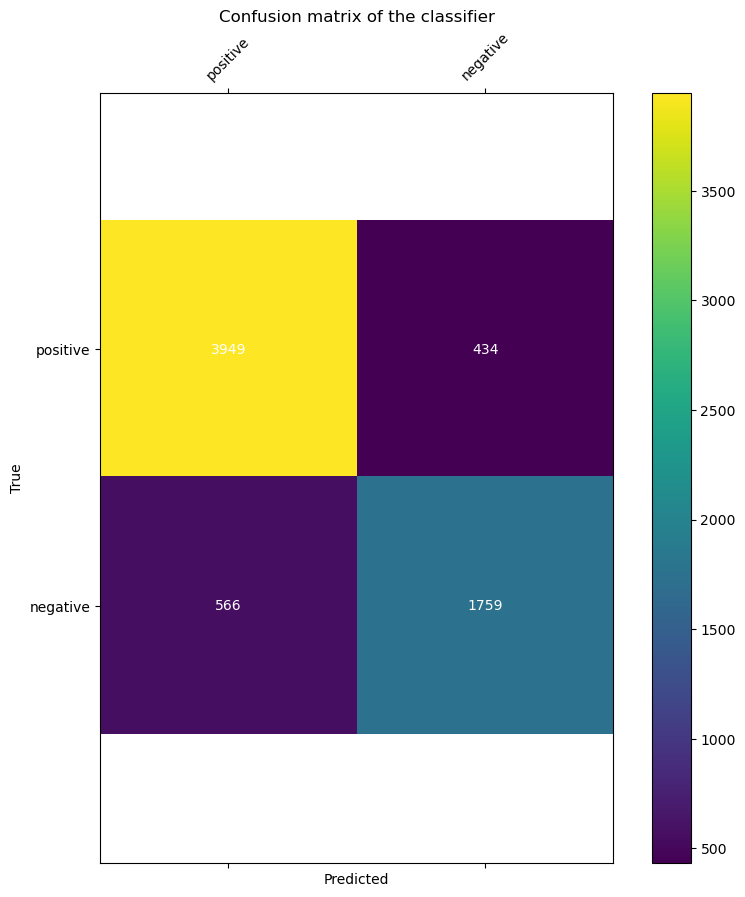

In [1]:
# 5th question working (Iteration 1)
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import csv
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Function to load data
def load_data(path):
    with open(path,encoding="utf8") as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))
            tuple(raw_data)

# Function to split and preprocess data
def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))

    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)), label))

    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)), label))

def parse_data_line(data_line):
    label, text = data_line[1], data_line[2]
    return (label, text)

# Input: a string of one statement
def pre_process(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Normalization and lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]

    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

    return tokens

global_feature_dict = {}  # A global dictionary of features

def to_feature_vector(tokens, label=None):
    # Should return a dictionary containing features as keys, and weights as values
    feature_vector = {}

    # Example: Using unigram tokens
    for token in tokens:
        feature_key = token
        feature_vector[feature_key] = 1

        if feature_key in global_feature_dict:
            global_feature_dict[feature_key] += 1
        else:
            global_feature_dict[feature_key] = 1

    # Example: Using bigrams
    bigrams = list(zip(tokens, tokens[1:]))
    for bigram in bigrams:
        feature_key = '_'.join(bigram)
        feature_vector[feature_key] = 1

        if feature_key in global_feature_dict:
            global_feature_dict[feature_key] += 1
        else:
            global_feature_dict[feature_key] = 1

    # Example: Using character n-grams (n=3)
    char_ngrams = [token[i:i + 3] for token in tokens for i in range(len(token) - 2)]
    for ngram in char_ngrams:
        feature_key = ngram
        feature_vector[feature_key] = 1

        if feature_key in global_feature_dict:
            global_feature_dict[feature_key] += 1
        else:
            global_feature_dict[feature_key] = 1

    if label is not None:
        feature_vector['_label_'] = label

    return feature_vector

def train_classifier(data):
    print("Training Classifier...")
    pipeline = Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

def cross_validate(dataset, folds):
    results = {'precision': 0, 'recall': 0, 'f1': 0, 'accuracy': 0}
    fold_size = int(len(dataset) / folds)

    for i in range(folds):
        print("Fold start on items %d - %d" % (i * fold_size, (i + 1) * fold_size))

        train_data_fold = dataset[:i * fold_size] + dataset[(i + 1) * fold_size:]
        test_data_fold = dataset[i * fold_size: (i + 1) * fold_size]

        classifier = train_classifier(train_data_fold)

        test_true = [t[1] for t in test_data_fold]

        if isinstance(test_data_fold[0][0], dict):
            test_pred = predict_labels([x[0] for x in test_data_fold], classifier)
        else:
            test_pred = predict_labels([x[0] for x in test_data_fold], classifier)

        fold_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted')
        fold_accuracy = accuracy_score(test_true, test_pred)

        results['precision'] += fold_scores[0]
        results['recall'] += fold_scores[1]
        results['f1'] += fold_scores[2]
        results['accuracy'] += fold_accuracy

    results['precision'] /= folds
    results['recall'] /= folds
    results['f1'] /= folds
    results['accuracy'] /= folds

    return results

# PREDICTING LABELS GIVEN A CLASSIFIER
def predict_labels(samples, classifier):
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    preprocessed_sample = to_feature_vector(pre_process(sample))
    return classifier.classify(preprocessed_sample)

def confusion_matrix_heatmap(y_test, preds, labels):
    cm = confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')

    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.show()

def error_analysis(true_labels, predicted_labels, data):
    false_positives = []
    false_negatives = []
    for i in range(len(true_labels)):
        if true_labels[i] == 'positive' and predicted_labels[i] == 'negative':
            false_negatives.append(data[i])
        elif true_labels[i] == 'negative' and predicted_labels[i] == 'positive':
            false_positives.append(data[i])

    # Print or save false positives and false negatives to files
    print_errors_to_file(false_positives, 'false_positives.txt')
    print_errors_to_file(false_negatives, 'false_negatives.txt')

def print_errors_to_file(errors, filename):
    with open(filename, 'w', encoding="utf8") as f:
        for error in errors:
            text, label = error
            f.write(f"Label: {label}, Text: {text}\n\n")

# MAIN
raw_data = []
train_data = []
test_data = []

data_file_path = 'sentiment-dataset.tsv'

print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...", sep='\n')

load_data(data_file_path)

print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...", sep='\n')

split_and_preprocess_data(0.8)

print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')

tokenized_train_data = train_data

cross_validation_results = cross_validate(tokenized_train_data, 10)
print("Cross-validation results:")
for metric, value in cross_validation_results.items():
    print(f"{metric}: {value}")

# Train classifier
classifier = train_classifier(train_data)
# Predict labels
true_labels = [sample[1] for sample in test_data]
predicted_labels = predict_labels([sample[0] for sample in test_data], classifier)
data = test_data

# Perform error analysis
error_analysis(true_labels, predicted_labels, data)

# Plot confusion matrix
print('The confusion matrix: ')
confusion_matrix_heatmap(true_labels, predicted_labels, labels=['positive', 'negative'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
327621
Fold start on items 0 - 2683
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold start on items 2683 - 5366
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold start on items 5366 - 8049
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold start on items 8049 - 10732
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold start on items 10732 - 13415
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold start on items 13415 - 16098
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold start on items 16098 - 18781
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold start on items 18781 - 21464
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold start on items 21464 - 24147
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fold start on items 24147 - 26830
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross-validation results:
precision: 0.8446975613607265
recall: 0.846552366753634
f1: 0.8450740113199814
accuracy: 0.846552366753634
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The confusion matrix: 


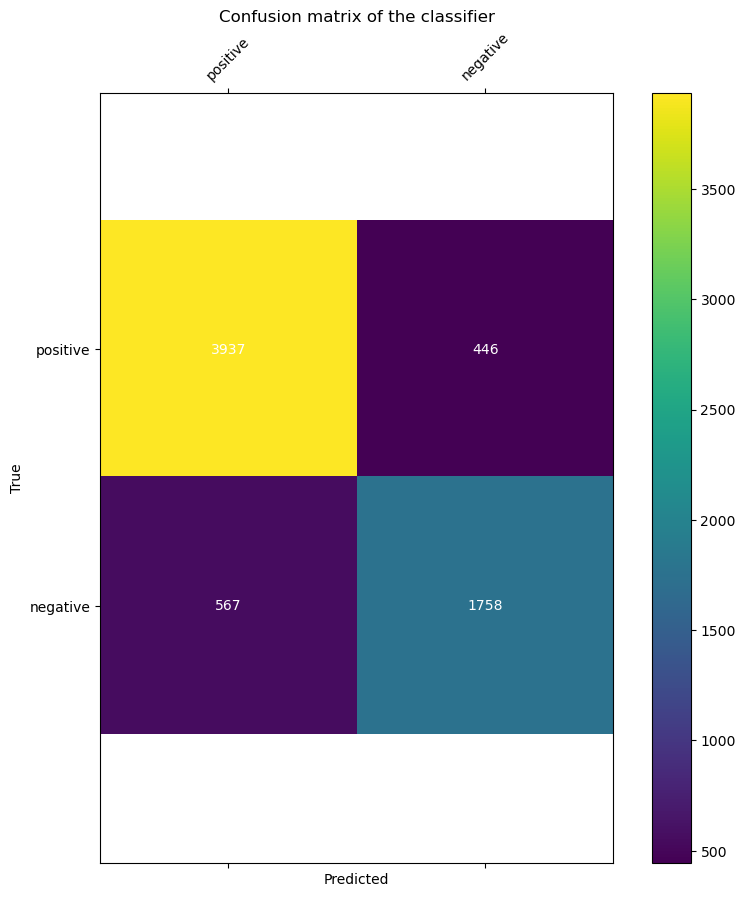

In [2]:
# 5th question working improvised (Iteration 2)
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import csv
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Function to load data
def load_data(path):
    with open(path,encoding="utf8") as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))
            tuple(raw_data)

# Function to split and preprocess data
def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))

    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)), label))

    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)), label))

def parse_data_line(data_line):
    label, text = data_line[1], data_line[2]
    return (label, text)

def words_per_sentence(text):
    sentences = nltk.sent_tokenize(text)
    return [len(nltk.word_tokenize(sentence)) for sentence in sentences]

# Modify the pre_process function to include the number of words per sentence
def pre_process(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Normalization and lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]

    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

    # Calculate number of words per sentence
    words_per_sentence_list = words_per_sentence(text)

    return tokens + words_per_sentence_list

def to_feature_vector(tokens, label=None):
    # Should return a dictionary containing features as keys, and weights as values
    feature_vector = {}

    # Example: Using unigram tokens
    for token in tokens:
        feature_key = str(token)  # Convert to string
        feature_vector[feature_key] = 1

        if feature_key in global_feature_dict:
            global_feature_dict[feature_key] += 1
        else:
            global_feature_dict[feature_key] = 1

    # Example: Using bigrams
    bigrams = list(zip(map(str, tokens), map(str, tokens[1:])))
    for bigram in bigrams:
        feature_key = '_'.join(bigram)
        feature_vector[feature_key] = 1

        if feature_key in global_feature_dict:
            global_feature_dict[feature_key] += 1
        else:
            global_feature_dict[feature_key] = 1

    # Example: Using character n-grams (n=3)
    char_ngrams = [str(token)[i:i + 3] for token in tokens if isinstance(token, str) for i in range(len(str(token)) - 2)]
    for ngram in char_ngrams:
        feature_key = ngram
        feature_vector[feature_key] = 1

        if feature_key in global_feature_dict:
            global_feature_dict[feature_key] += 1
        else:
            global_feature_dict[feature_key] = 1

    # Example: Adding the number of words per sentence
    words_per_sentence_list = tokens[len(tokens) // 2:]
    for idx, num_words in enumerate(words_per_sentence_list):
        feature_key = f'words_per_sentence_{idx}'
        feature_vector[feature_key] = num_words

        if feature_key in global_feature_dict:
            global_feature_dict[feature_key] += 1
        else:
            global_feature_dict[feature_key] = 1

    if label is not None:
        feature_vector['_label_'] = label

    return feature_vector

def train_classifier(data):
    print("Training Classifier...")
    pipeline = Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

def cross_validate(dataset, folds):
    results = {'precision': 0, 'recall': 0, 'f1': 0, 'accuracy': 0}
    fold_size = int(len(dataset) / folds)

    for i in range(folds):
        print("Fold start on items %d - %d" % (i * fold_size, (i + 1) * fold_size))

        # Split the data into training and test sets for this fold
        train_data_fold = dataset[:i * fold_size] + dataset[(i + 1) * fold_size:]
        test_data_fold = dataset[i * fold_size: (i + 1) * fold_size]

        # Train the classifier on the training fold
        classifier = train_classifier(train_data_fold)

        # Test the classifier on the test fold
        test_true = [t[1] for t in test_data_fold]

        # Check the type of input data
        if isinstance(test_data_fold[0][0], dict):  # Check if it's a dictionary
            test_pred = predict_labels([x[0] for x in test_data_fold], classifier)
        else:  # Assume it's a sparse matrix
            test_pred = predict_labels([x[0] for x in test_data_fold], classifier)

        # Evaluate the classifier's performance
        fold_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted')
        fold_accuracy = accuracy_score(test_true, test_pred)

        # Update the results dictionary with fold scores
        results['precision'] += fold_scores[0]
        results['recall'] += fold_scores[1]
        results['f1'] += fold_scores[2]
        results['accuracy'] += fold_accuracy

    # Calculate average scores
    results['precision'] /= folds
    results['recall'] /= folds
    results['f1'] /= folds
    results['accuracy'] /= folds

    return results

# PREDICTING LABELS GIVEN A CLASSIFIER
def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    preprocessed_sample = to_feature_vector(pre_process(sample))
    return classifier.classify(preprocessed_sample)

def confusion_matrix_heatmap(y_test, preds, labels):
    cm = confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')

    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.show()

def error_analysis(true_labels, predicted_labels, data):
    false_positives = []
    false_negatives = []
    for i in range(len(true_labels)):
        if true_labels[i] == 'positive' and predicted_labels[i] == 'negative':
            false_negatives.append(data[i])
        elif true_labels[i] == 'negative' and predicted_labels[i] == 'positive':
            false_positives.append(data[i])

    # Print or save false positives and false negatives to files
    print_errors_to_file(false_positives, 'false_positives.txt')
    print_errors_to_file(false_negatives, 'false_negatives.txt')

def print_errors_to_file(errors, filename):
    with open(filename, 'w', encoding="utf8") as f:
        for error in errors:
            text, label = error
            f.write(f"Label: {label}, Text: {text}\n\n")

# MAIN
raw_data = []
train_data = []
test_data = []

data_file_path = 'sentiment-dataset.tsv'

print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...", sep='\n')

load_data(data_file_path)

print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...", sep='\n')

split_and_preprocess_data(0.8)

print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')

tokenized_train_data = train_data

cross_validation_results = cross_validate(tokenized_train_data, 10)
print("Cross-validation results:")
for metric, value in cross_validation_results.items():
    print(f"{metric}: {value}")

# Train classifier
classifier = train_classifier(train_data)
# Predict labels
true_labels = [sample[1] for sample in test_data]
predicted_labels = predict_labels([sample[0] for sample in test_data], classifier)
data = test_data

# Perform error analysis
error_analysis(true_labels, predicted_labels, data)

# Plot confusion matrix
print('The confusion matrix: ')
confusion_matrix_heatmap(true_labels, predicted_labels, labels=['positive', 'negative'])

In [3]:
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

({'tomorrow': 1, 'release': 1, '58th': 1, 'episode': 1, 'hsonair': 1, 'profiling': 1, 'alissadossantos': 1, 'talk': 1, 'storytelling': 1, 'beyonce': 1, '17': 1, '8': 1, 'tomorrow_release': 1, 'release_58th': 1, '58th_episode': 1, 'episode_hsonair': 1, 'hsonair_profiling': 1, 'profiling_alissadossantos': 1, 'alissadossantos_talk': 1, 'talk_storytelling': 1, 'storytelling_beyonce': 1, 'beyonce_17': 1, '17_8': 1, 'tom': 1, 'omo': 1, 'mor': 1, 'orr': 1, 'rro': 1, 'row': 1, 'rel': 1, 'ele': 1, 'lea': 1, 'eas': 1, 'ase': 1, '58t': 1, '8th': 1, 'epi': 1, 'pis': 1, 'iso': 1, 'sod': 1, 'ode': 1, 'hso': 1, 'son': 1, 'ona': 1, 'nai': 1, 'air': 1, 'pro': 1, 'rof': 1, 'ofi': 1, 'fil': 1, 'ili': 1, 'lin': 1, 'ing': 1, 'ali': 1, 'lis': 1, 'iss': 1, 'ssa': 1, 'sad': 1, 'ado': 1, 'dos': 1, 'oss': 1, 'san': 1, 'ant': 1, 'nto': 1, 'tos': 1, 'tal': 1, 'alk': 1, 'sto': 1, 'tor': 1, 'ory': 1, 'ryt': 1, 'yte': 1, 'tel': 1, 'ell': 1, 'lli': 1, 'bey': 1, 'eyo': 1, 'yon': 1, 'onc': 1, 'nce': 1, 'words_per_sente

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Done training!
Precision: 0.847607
Recall: 0.848986
F Score:0.847997
